In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

from pandas_profiling import ProfileReport

In [153]:
data = pd.read_csv('./dataset/hour.csv')
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [154]:
data = data.rename(columns={'dteday':'date',
                            'weathersit':'weather',
                            'yr':'year',
                            'mnth':'month',
                            'hr':'hour',
                            'hum':'humidity',
                            'cnt':'count'})
data.head(7)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2


In [155]:
data = data.drop(columns=['date', 'instant', 'casual', 'registered'])

In [156]:
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
numerical_columns = ['hour', 'temp', 'atemp', 'humidity', 'windspeed']

In [157]:
data[categorical_columns] = data[categorical_columns].astype('category')

In [158]:
data.describe()

,hour,temp,atemp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.496987,0.475775,0.627229,0.190098,189.463088
std,6.914405,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  category
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 935.1 KB


In [160]:
data.apply(lambda x: x.nunique())

season          4
year            2
month          12
hour           24
holiday         2
weekday         7
workingday      2
weather         4
temp           50
atemp          65
humidity       89
windspeed      30
count         869
dtype: int64

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  category
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 935.1 KB


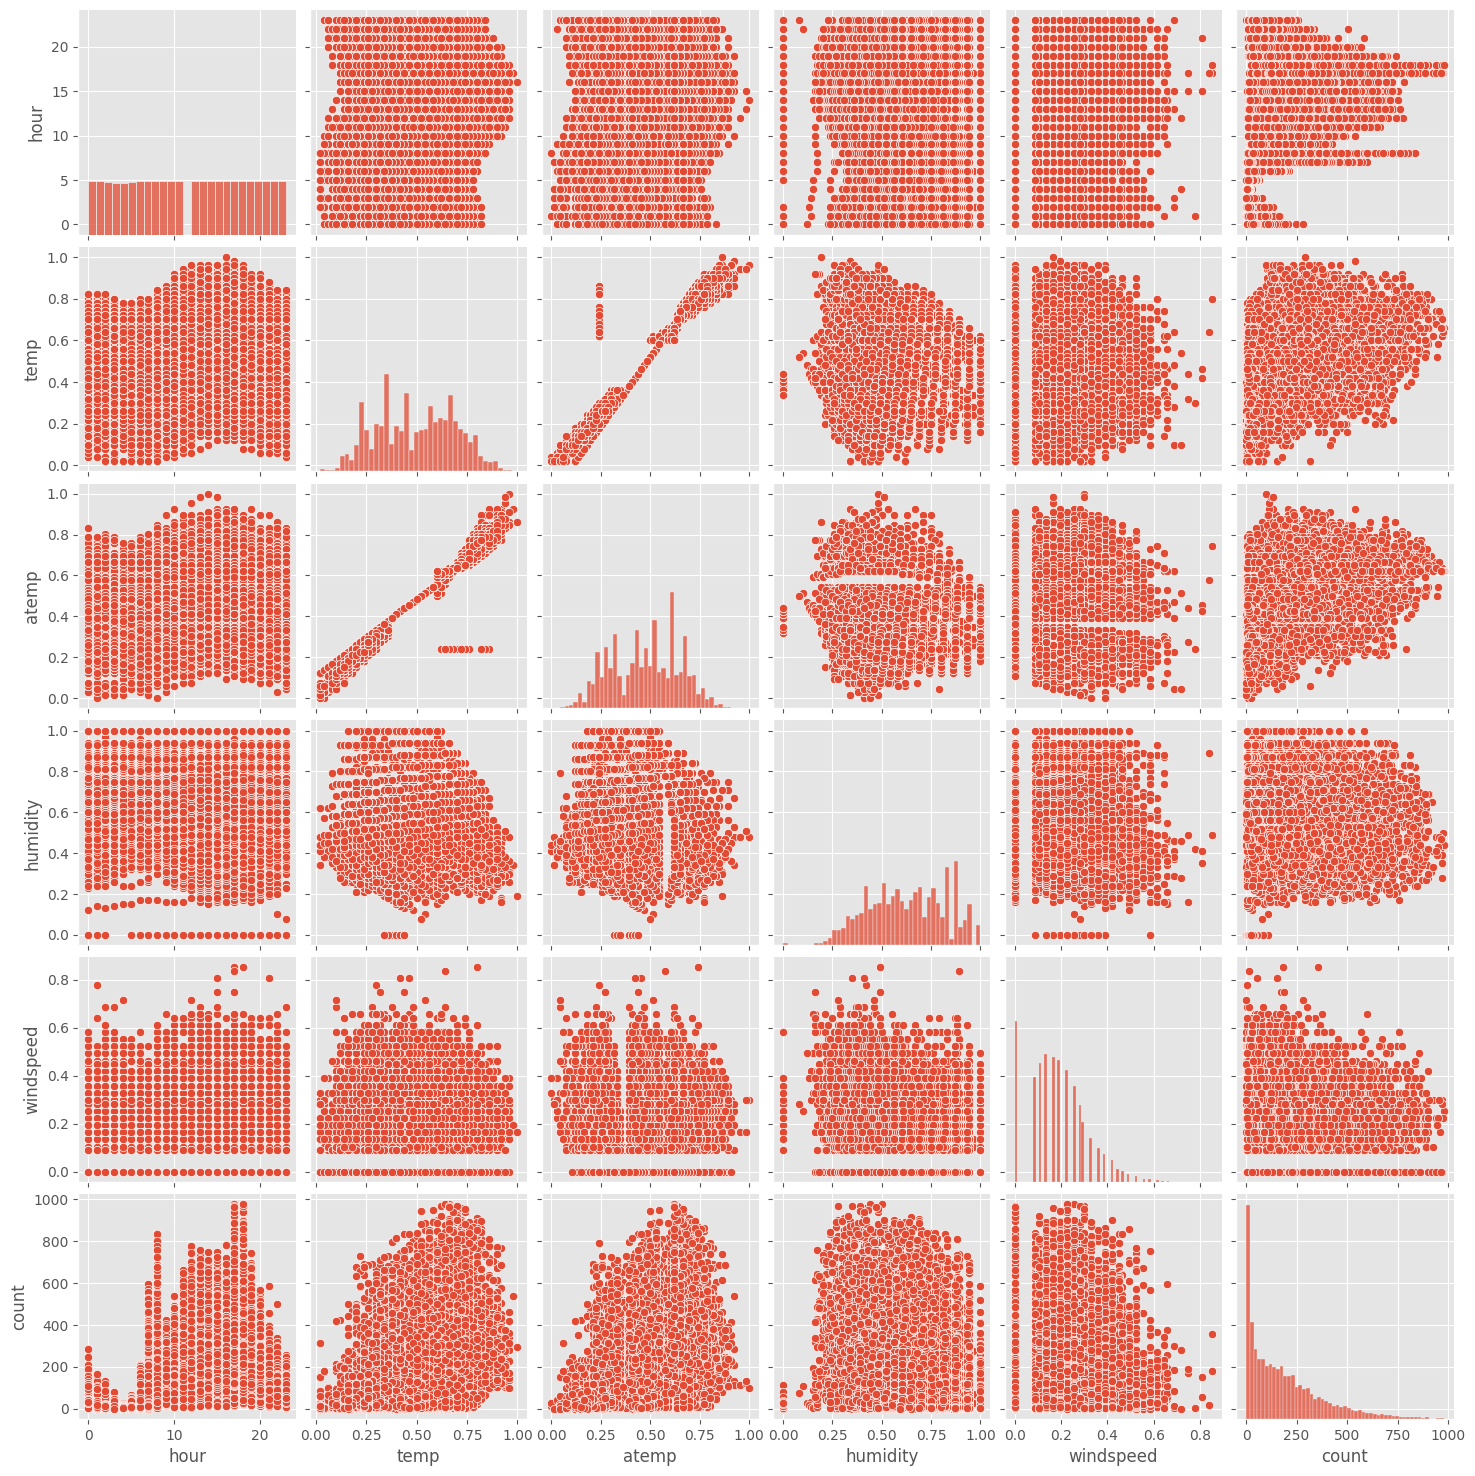

In [162]:
sns.pairplot(data)

In [163]:
ProfileReport(data).to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Asus\AppData\Local\Temp\ipykernel_28420\506860906.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='viridis', annot=True)


<AxesSubplot: >

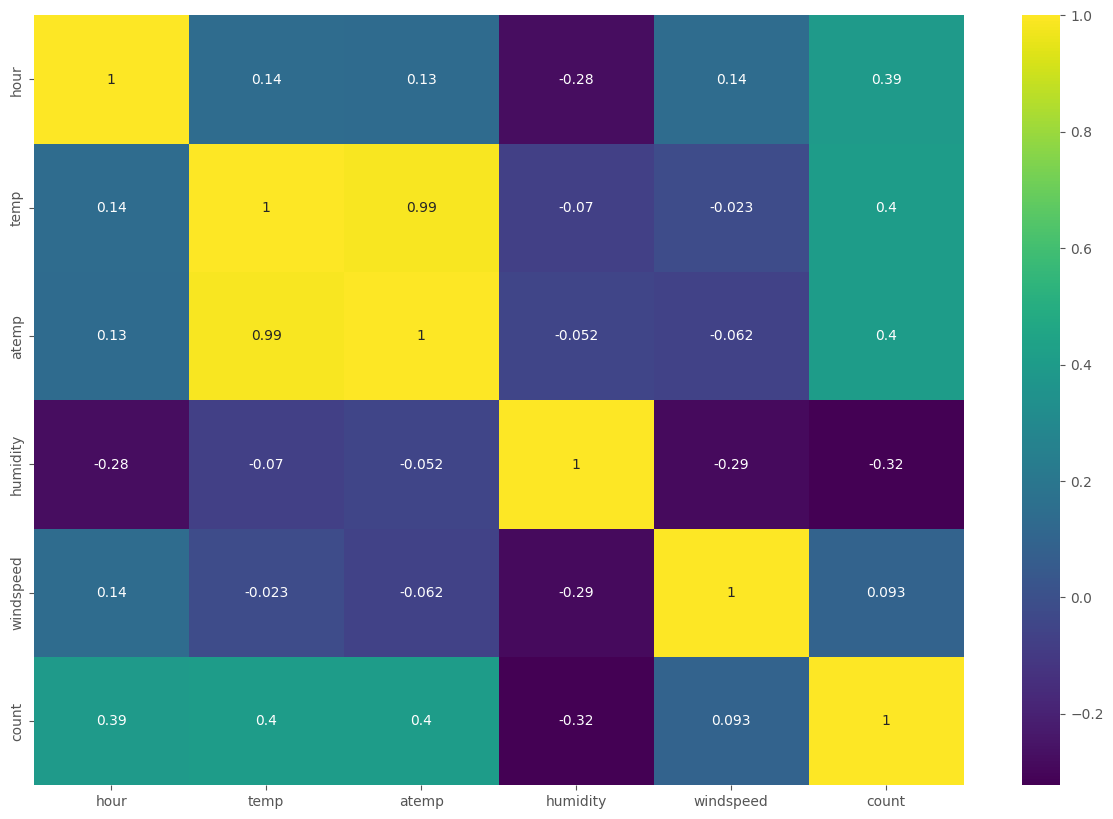

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='viridis', annot=True)

In [165]:
data.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

#### Observations
1. month is highly overall correlated with season
2. atemp is highly overall correlated with temp
3. year has only 2 values; useless

### AI
1. Drop columns: season, atemp, year

In [166]:
df = data.drop(columns=['season', 'atemp', 'year'])
df.head()

,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,4,0,6,0,1,0.24,0.75,0.0,1


## Splitting into feature and target

In [167]:
from sklearn.utils import shuffle

In [168]:
df = shuffle(df).reset_index(drop=True)

In [169]:
X = df.drop(columns=['count'])
y = df['count']
X.shape, y.shape

((17379, 9), (17379,))

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 9), (5214, 9), (12165,), (5214,))

In [172]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

### Standardizing the data

In [173]:
ss = StandardScaler()
X_train_trf = ss.fit_transform(X_train)
X_test_trf = ss.transform(X_test)

In [174]:
df.head()

,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,11,0,0,5,1,1,0.34,0.57,0.1642,50
1,5,9,0,2,1,2,0.56,0.68,0.3582,295
2,4,12,0,0,0,1,0.64,0.44,0.2836,635
3,5,20,0,6,0,1,0.62,0.46,0.1642,287
4,10,19,0,6,0,1,0.24,0.87,0.3582,39


0: sunday
1: monday
..
6: saturday


In [175]:
pd.crosstab(index=df['holiday'], columns=df['workingday'])

workingday,0,1
holiday,,
0,5014,11865
1,500,0


In [176]:
data.groupby(['weather'])['count'].agg('sum')

weather
1    2338173
2     795952
3     158331
4        223
Name: count, dtype: int64

In [177]:
data.groupby(['season', 'weekday'])['count'].agg('sum')

season  weekday
1       0           60195
        1           63771
        2           69813
        3           65277
        4           72355
        5           74264
        6           65673
2       0          129650
        1          123255
        2          125449
        3          130547
        4          135207
        5          135792
        6          138689
3       0          138431
        1          146307
        2          152715
        3          158054
        4          159561
        5          155267
        6          150794
4       0          115751
        1          122170
        2          121132
        3          119170
        4          118272
        5          122467
        6          122651
Name: count, dtype: int64

In [178]:
df.columns

Index(['month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [179]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
X_test_trf = pd.DataFrame(X_test_trf, columns=X_test.columns)

In [180]:
ohe_columns = ['month', 'holiday', 'weekday', 'workingday']

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    # ('tnf1', OrdinalEncoder(categories=[[1,2,3,4]]),['weather']),
    ('tnf2', OneHotEncoder(sparse = False, drop ='first'), ohe_columns)
], remainder='passthrough')

In [181]:
X_train_trf1 = transformer.fit_transform(X_train_trf)
X_test_trf1 = transformer.transform(X_test_trf)

c:\Users\Asus\.conda\envs\ML_BASE\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [182]:
pd.DataFrame(X_test_trf1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.797710,2.484321,0.115861,1.318240,-0.207779
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.652569,2.484321,-0.401710,-0.240154,0.036899
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.524550,-0.660176,-0.815767,-1.071297,2.487784
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.233134,0.912072,1.254517,-0.395993,0.036899
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.798844,-0.660176,0.529918,0.798775,-0.207779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.523417,-0.660176,0.322889,0.539043,1.630590
5210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.217145,0.912072,-0.298196,-0.447939,2.487784
5211,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.379409,-0.660176,1.151003,0.590990,0.282398
5212,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.523417,0.912072,-0.712253,0.435150,-0.453278


In [183]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [184]:
cv= KFold(n_splits=10, shuffle=True)
cross_val_score(RandomForestRegressor(), X_train_trf1, y_train, cv=cv, scoring='r2', n_jobs= -1)

array([0.85850545, 0.85142004, 0.84684055, 0.85745248, 0.86476825,
       0.84147775, 0.84806647, 0.86374124, 0.8484948 , 0.83150207])

In [185]:
models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

In [186]:
for m in models:
    m.fit(X_train_trf1, y_train)
    print(m, r2_score(y_test, m.predict(X_test_trf1)), np.sqrt(mean_squared_error(y_test, m.predict(X_test_trf1))))

LinearRegression() 0.3506542147502839 147.3562441951237
RandomForestRegressor() 0.8588142765052641 68.71094516298345
DecisionTreeRegressor() 0.743048455119413 92.69496553740152


In [187]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_trf1, y_train)
print(r2_score(y_test, xgb_model.predict(X_test_trf1)))
print(np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test_trf1))))

0.8695680479641512
66.04235140676313


In [188]:
print(r2_score(y_train, xgb_model.predict(X_train_trf1)))
print(np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train_trf1))))

0.9379311122372531
45.02778608069773


In [189]:
regressor = xgb.XGBRegressor(objective="reg:linear", 
                 colsample_bytree = 1, 
                 eta=0.3, 
                 learning_rate = 0.01,
                 max_depth = 5, 
                 alpha = 10, 
                 n_estimators = 500)

In [190]:
regressor.fit(X_train_trf1, y_train)
print(r2_score(y_test, regressor.predict(X_test_trf1)))
print(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test_trf1))))

[05:24:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.8290716204196716
75.60275444296084


In [191]:
import xgboost as xgb

In [192]:
def objectives(n_trial):

    params ={
        "n_estimators" : n_trial.suggest_int("n_estimators",100,400),
        "learning_rate" : n_trial.suggest_loguniform("learning_rate",1e-4,0.1,log=True),
        "max_depth" : n_trial.suggest_int("max_depth",5,15),
        "subsample" : n_trial.suggest_float('subsample',0.01,1.0,log=True),
        'reg_alpha': n_trial.suggest_float('reg_alpha', 1e-8, 1.0,log=True),
        'reg_lambda': n_trial.suggest_float('reg_lambda', 1e-8, 1.0,log=True),
        'gamma' : n_trial.suggest_float('gamma',1e-8, 1.0,log=True),
        'min_child_weight': n_trial.suggest_int('min_child_weight', 1, 10)
        #'use_label_encoder': False

    }

    dtrain = xgb.DMatrix(data = X_train_trf1, label = y_train)
    dval = xgb.DMatrix(data = X_test_trf1, label = y_test)

    regressor = xgb.train(params, dtrain) 
    y_pred = regressor.predict(dval)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

In [193]:
import logging
logging.getLogger("optuna").setLevel(logging.ERROR)

In [194]:
study = optuna.create_study(direction="minimize")
study.optimize(objectives, n_trials=700)


[05:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[05:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[05:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[05:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[05:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

In [195]:

print(f"Optimized RMSE: {study.best_value:.4f}")
print("+")
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Optimized RMSE: 112.3188
+
Best params:
	n_estimators: 100
	learning_rate: 0.09981050099176014
	max_depth: 15
	subsample: 0.8771127632248036
	reg_alpha: 0.6100132166731763
	reg_lambda: 2.9180436557587076e-05
	gamma: 0.07856876779659772
	min_child_weight: 4


In [196]:
params = study.best_params

C:\Users\Asus\AppData\Local\Temp\ipykernel_28420\199994575.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<AxesSubplot: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

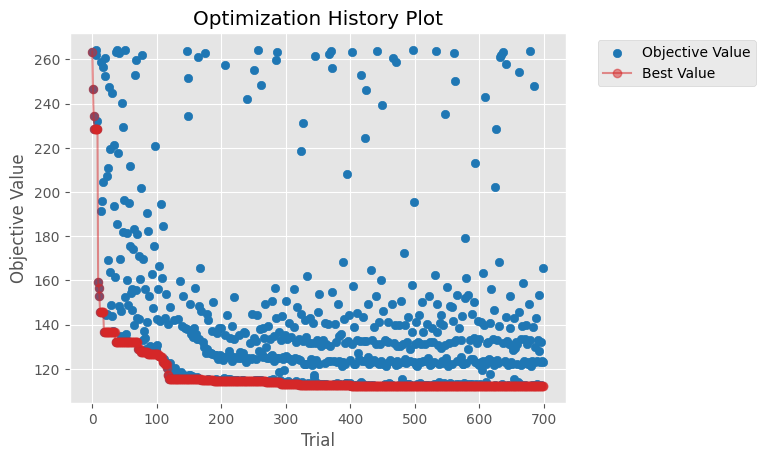

In [197]:
from optuna.visualization.matplotlib import plot_optimization_history
plot_optimization_history(study)

In [198]:
model = xgb.XGBRegressor(**params)
model.fit(X_train_trf1, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.07856876779659772, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09981050099176014, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [199]:
print(r2_score(y_test, model.predict(X_test_trf1)))
print(np.sqrt(mean_squared_error(y_test, model.predict(X_test_trf1))))

0.868196430697757
66.38869264243809
